In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.ensemble
import sklearn
from pylab import mpl
import matplotlib.pyplot as plt

In [10]:
if __name__=="__main__":
    # data_No记录打开的数据集
    data_No = 0
    # 设置存储所有数据的DataFrame
    pd_data = pd.DataFrame()
    # 设置绘图字体
    mpl.rcParams['font.sans-serif'] = ['DengXian']
    mpl.rcParams['axes.unicode_minus'] = False
    # 这里是数据文件夹的路径
    datadir_path = "D:/编程类/实车SOC/data/"
    # 使用dir_list存储数据文件夹下的子文件夹
    dir_list = os.listdir(datadir_path)
    # 后续代码使用第一个文件夹中的第一个文件为例
    file_dir_path = datadir_path + dir_list[data_No] + "/"
    file_name_list = os.listdir(file_dir_path)
    file_name = file_name_list[0]
    file_path = file_dir_path + file_name
    temp_data = pd.read_csv(file_path)
    pd_data = pd_data.append(temp_data)
    column = ['车速','总电压','总电流','累计里程','SOC','电池单体电压最高值','电池单体电压最低值','最高温度值','最低温度值','驱动电机转速','驱动电机转矩',
              '驱动电机温度','驱动电机控制器温度','电机控制器输入电压','电机控制器直流母流电流','加速踏板行程值'] # 使用有效参数进行分析
    df = pd_data[column] # 将所需要用到的参数存入df变量

In [11]:
pd_data

,vin,时间,车速,车辆状态,充电状态,运行模式,总电压,总电流,累计里程,SOC,...,驱动电机转速,驱动电机转矩,驱动电机温度,驱动电机控制器温度,电机控制器输入电压,电机控制器直流母流电流,经度,维度,加速踏板行程值,制动踏板状态
0,LVCB4L4D0HM002829,2020-08-22 17:37:39,0.0,1.0,3.0,1.0,568.8,11.2,151304.2,76.0,...,20000.0,2000.0,91.0,84.0,568.8,1000.0,116475777.0,39869467.0,0.0,0.0
1,LVCB4L4D0HM002829,2020-08-22 17:37:54,0.0,1.0,3.0,1.0,568.8,11.1,151304.2,76.0,...,20000.0,2000.0,90.0,84.0,568.8,1000.0,116475777.0,39869467.0,0.0,0.0
2,LVCB4L4D0HM002829,2020-08-22 17:38:09,0.0,1.0,3.0,1.0,568.7,11.1,151304.2,76.0,...,20000.0,2000.0,90.0,85.0,568.7,1000.0,116475777.0,39869467.0,0.0,0.0
3,LVCB4L4D0HM002829,2020-08-22 17:38:24,0.0,1.0,3.0,1.0,568.7,11.1,151304.2,76.0,...,20000.0,2000.0,89.0,85.0,568.7,1000.0,116475777.0,39869467.0,0.0,0.0
4,LVCB4L4D0HM002829,2020-08-22 17:38:39,0.0,1.0,3.0,1.0,568.6,11.1,151304.2,76.0,...,20000.0,2000.0,89.0,85.0,568.6,1000.0,116475777.0,39869467.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862201,LVCB4L4D0HM002829,2021-03-02 21:51:34,0.0,1.0,3.0,1.0,581.3,4.4,180715.0,88.0,...,20000.0,2000.0,94.0,79.0,581.3,1000.0,116426869.0,39864498.0,0.0,100.0
862202,LVCB4L4D0HM002829,2021-03-02 21:51:49,12.0,1.0,3.0,1.0,580.9,-9.5,180715.0,88.0,...,20381.0,1809.0,94.0,80.0,580.9,992.2,116427141.0,39864571.0,0.0,0.0
862203,LVCB4L4D0HM002829,2021-03-02 21:52:04,0.0,1.0,3.0,1.0,580.9,4.2,180715.0,88.0,...,20000.0,2000.0,93.0,78.0,580.9,1000.0,116427334.0,39864541.0,0.0,0.0
862204,LVCB4L4D0HM002829,2021-03-02 21:52:19,0.0,1.0,3.0,1.0,580.8,4.1,180715.0,88.0,...,20000.0,2000.0,92.0,79.0,580.8,1000.0,116427334.0,39864541.0,0.0,0.0


In [9]:
df

,车速,总电压,总电流,累计里程,SOC,电池单体电压最高值,电池单体电压最低值,最高温度值,最低温度值,驱动电机转速,驱动电机转矩,驱动电机温度,驱动电机控制器温度,电机控制器输入电压,电机控制器直流母流电流,加速踏板行程值
0,0.0,568.8,11.2,151304.2,76.0,2.27,2.23,39.0,32.0,20000.0,2000.0,91.0,84.0,568.8,1000.0,0.0
1,0.0,568.8,11.1,151304.2,76.0,2.27,2.23,39.0,32.0,20000.0,2000.0,90.0,84.0,568.8,1000.0,0.0
2,0.0,568.7,11.1,151304.2,76.0,2.27,2.23,39.0,32.0,20000.0,2000.0,90.0,85.0,568.7,1000.0,0.0
3,0.0,568.7,11.1,151304.2,76.0,2.27,2.22,39.0,32.0,20000.0,2000.0,89.0,85.0,568.7,1000.0,0.0
4,0.0,568.6,11.1,151304.2,76.0,2.27,2.22,39.0,32.0,20000.0,2000.0,89.0,85.0,568.6,1000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862201,0.0,581.3,4.4,180715.0,88.0,2.33,2.27,17.0,12.0,20000.0,2000.0,94.0,79.0,581.3,1000.0,0.0
862202,12.0,580.9,-9.5,180715.0,88.0,2.32,2.26,17.0,12.0,20381.0,1809.0,94.0,80.0,580.9,992.2,0.0
862203,0.0,580.9,4.2,180715.0,88.0,2.32,2.27,17.0,12.0,20000.0,2000.0,93.0,78.0,580.9,1000.0,0.0
862204,0.0,580.8,4.1,180715.0,88.0,2.32,2.27,17.0,12.0,20000.0,2000.0,92.0,79.0,580.8,1000.0,0.0


In [4]:
df[df['总电压'].isna()]

,车速,总电压,总电流,累计里程,SOC,电池单体电压最高值,电池单体电压最低值,最高温度值,最低温度值,驱动电机转速,驱动电机转矩,驱动电机温度,驱动电机控制器温度,电机控制器输入电压,电机控制器直流母流电流,加速踏板行程值
138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
862078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
862082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
862087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


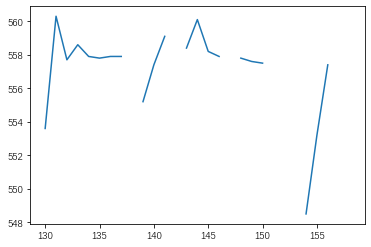

In [5]:
plt.plot(df['总电压'][130:160])

In [15]:
t = []
for i in pd_data['时间'][0:160]:
    t.append(pd.Timestamp(i))
x = []
for j in t:
    x.append(j.minute*60+j.second)
x = np.array(x).reshape(-1,1)
x_train = x[0:130]
y = np.array(df['总电压'][0:160])
y_train = y[0:130]
rf = sklearn.ensemble.RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

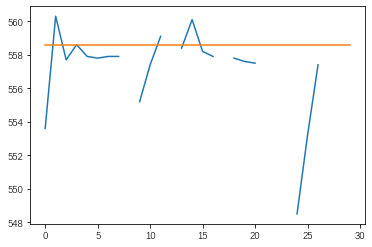

In [16]:
y_pre = rf.predict(x[130:160])
plt.plot(range(30),df['总电压'][130:160])
plt.plot(range(30),y_pre)
# 并没有取得较好的结果